In [62]:
#import nessesery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



In [63]:
# Read the dataset
credit=pd.read_csv('/content/credit.csv')

# **EDA**

In [24]:
#display first 4 rows and columns
credit.head(4)

ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                 26.822620              265.0   
1            809.98                 31.944960              266.0   
2            809.98                 28.609352              267.0   
3            809.98                 31.377862              268.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949                 21.46538   
1                     No            49.574949                 21.46538   
2                     No            49.574949                 21.46538   
3                     No            49.574949                 21.46538   

                 Payment_Behaviour Monthly_Balance  Credit_Score  
0  High_spent_Small_value_payments      312.494089          Good  
1   Low_spent_Large_value_payments      284.629162          Good  
2  Low_spent_Medium_value_payments      331.209863          Good  
3   Low_spent_Small_value_payments      223.451310          Good  

[4 rows x 28 columns]

In [25]:
#Display the names of columns in dataset credit
credit.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [26]:
#shape of dataset(no.of rows & no.of columns)
credit.shape

(100000, 28)

In [27]:
#Data types
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

There is no missing values in any columns of dataset

In [15]:
#Check the null values in the dataset
credit.isnull().sum()

Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [28]:
#Statistical information of numerical variables
credit.describe()

ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000             303.645417           0.000000   
25%    2.451686e+08   19342.972500            1626.594167           3.000000   
50%    5.006886e+08   36999.705000            3095.905000           5.000000   
75%    7.560027e+08   71683.470000            5957.715000           7.000000   
max    9.999934e+08  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate  ...  Delay_from_due_date  \
count    100000.000000   100000.00000  ...         100000.00000   
mean          5.533570       14.53208  ...             21.08141   
std           2.067098        8.74133  ...             14.80456   
min           0.000000        1.00000  ...              0.00000   
25%           4.000000        7.00000  ...             10.00000   
50%           5.000000       13.00000  ...             18.00000   
75%           7.000000       20.00000  ...             28.00000   
max          11.000000       34.00000  ...             62.00000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count           100000.000000         100000.000000         100000.000000   
mean                13.313120             10.470323              5.798250   
std                  6.237166              6.609481              3.867826   
min                  0.000000              0.500000              0.000000   
25%                  9.000000              5.380000              3.000000   
50%                 14.000000              9.400000              5.000000   
75%                 18.000000             14.850000              8.000000   
max                 25.000000             29.980000             17.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count     100000.000000             100000.000000       100000.000000   
mean        1426.220376                 32.285173          221.220460   
std         1155.129026                  5.116875           99.680716   
min            0.230000                 20.000000            1.000000   
25%          566.072500                 28.052567          144.000000   
50%         1166.155000                 32.305784          219.000000   
75%         1945.962500                 36.496663          302.000000   
max         4998.070000                 50.000000          404.000000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count        100000.000000            100000.000000    100000.000000  
mean            107.699208                55.101315       392.697586  
std             132.267056                39.006932       201.652719  
min               0.000000                 0.000000         0.007760  
25%              29.268886                27.959111       267.615983  
50%              66.462304                45.156550       333.865366  
75%             147.392573                71.295797       463.215683  
max            1779.103254               434.191089      1183.930696  

[8 rows x 21 columns]

In [29]:
#statistical information of catagorivariables
credit.describe(include='object')

Name Occupation Type_of_Loan Credit_Mix Payment_of_Min_Amount  \
count     100000     100000       100000     100000                100000   
unique     10128         15         6261          3                     3   
top     Jessicad     Lawyer      No Data   Standard                   Yes   
freq          48       7096        11408      45848                 52326   

                     Payment_Behaviour Credit_Score  
count                           100000       100000  
unique                               6            3  
top     Low_spent_Small_value_payments     Standard  
freq                             28616        53174

In [30]:
# check duplicates
credit.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [31]:
# define numerical & categorical columns
num_cols = credit.select_dtypes(exclude='object').columns.tolist()
cat_cols = credit.select_dtypes(include='object').columns.tolist()

# print columns
print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 21 numerical columns : ['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

We have 7 categorical columns : ['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [45]:
credit['Type_of_Loan'].value_counts()

No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgag

In [46]:
credit['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [47]:
credit['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

In [48]:
credit['Credit_Mix'].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

# **DATA VISUALIZATION**

UNIVARIATE ANALYSIS

In [32]:
credit['Credit_Score'].value_counts()



Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

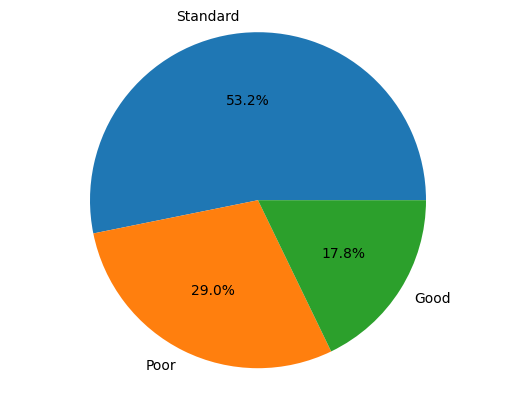

In [34]:
plt.pie(credit['Credit_Score'].value_counts(), labels=['Standard', 'Poor','Good'], autopct='%0.1f%%')
plt.axis('equal')
plt.show()

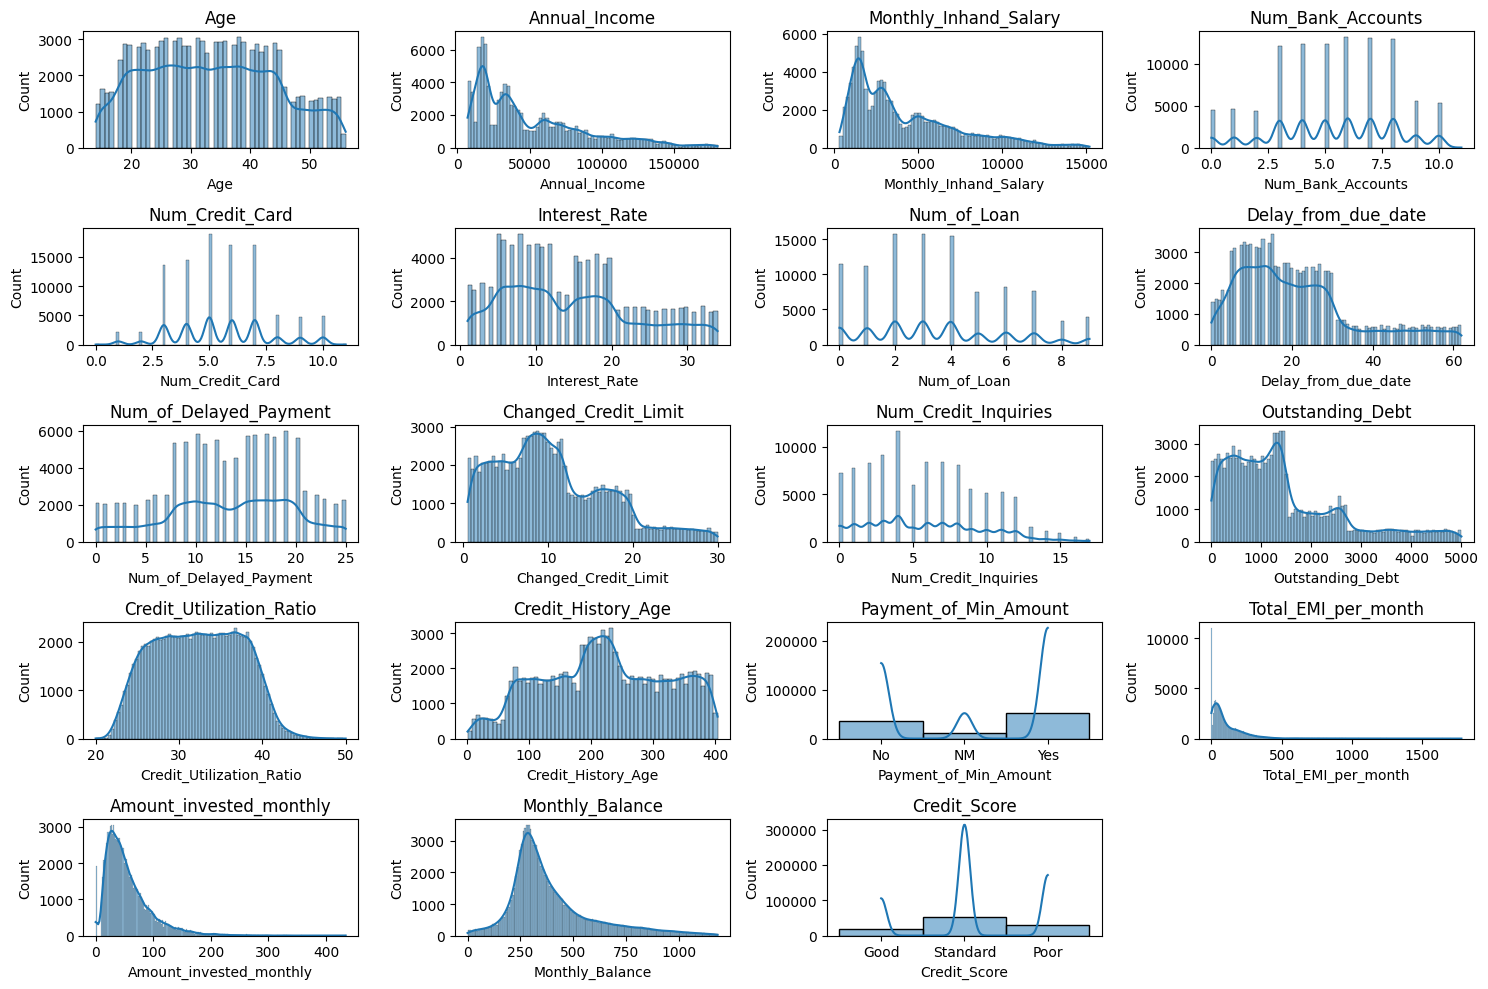

In [35]:
# Numerical variables
numerical_vars = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score']

# Plot histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data=credit, x=var, kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()


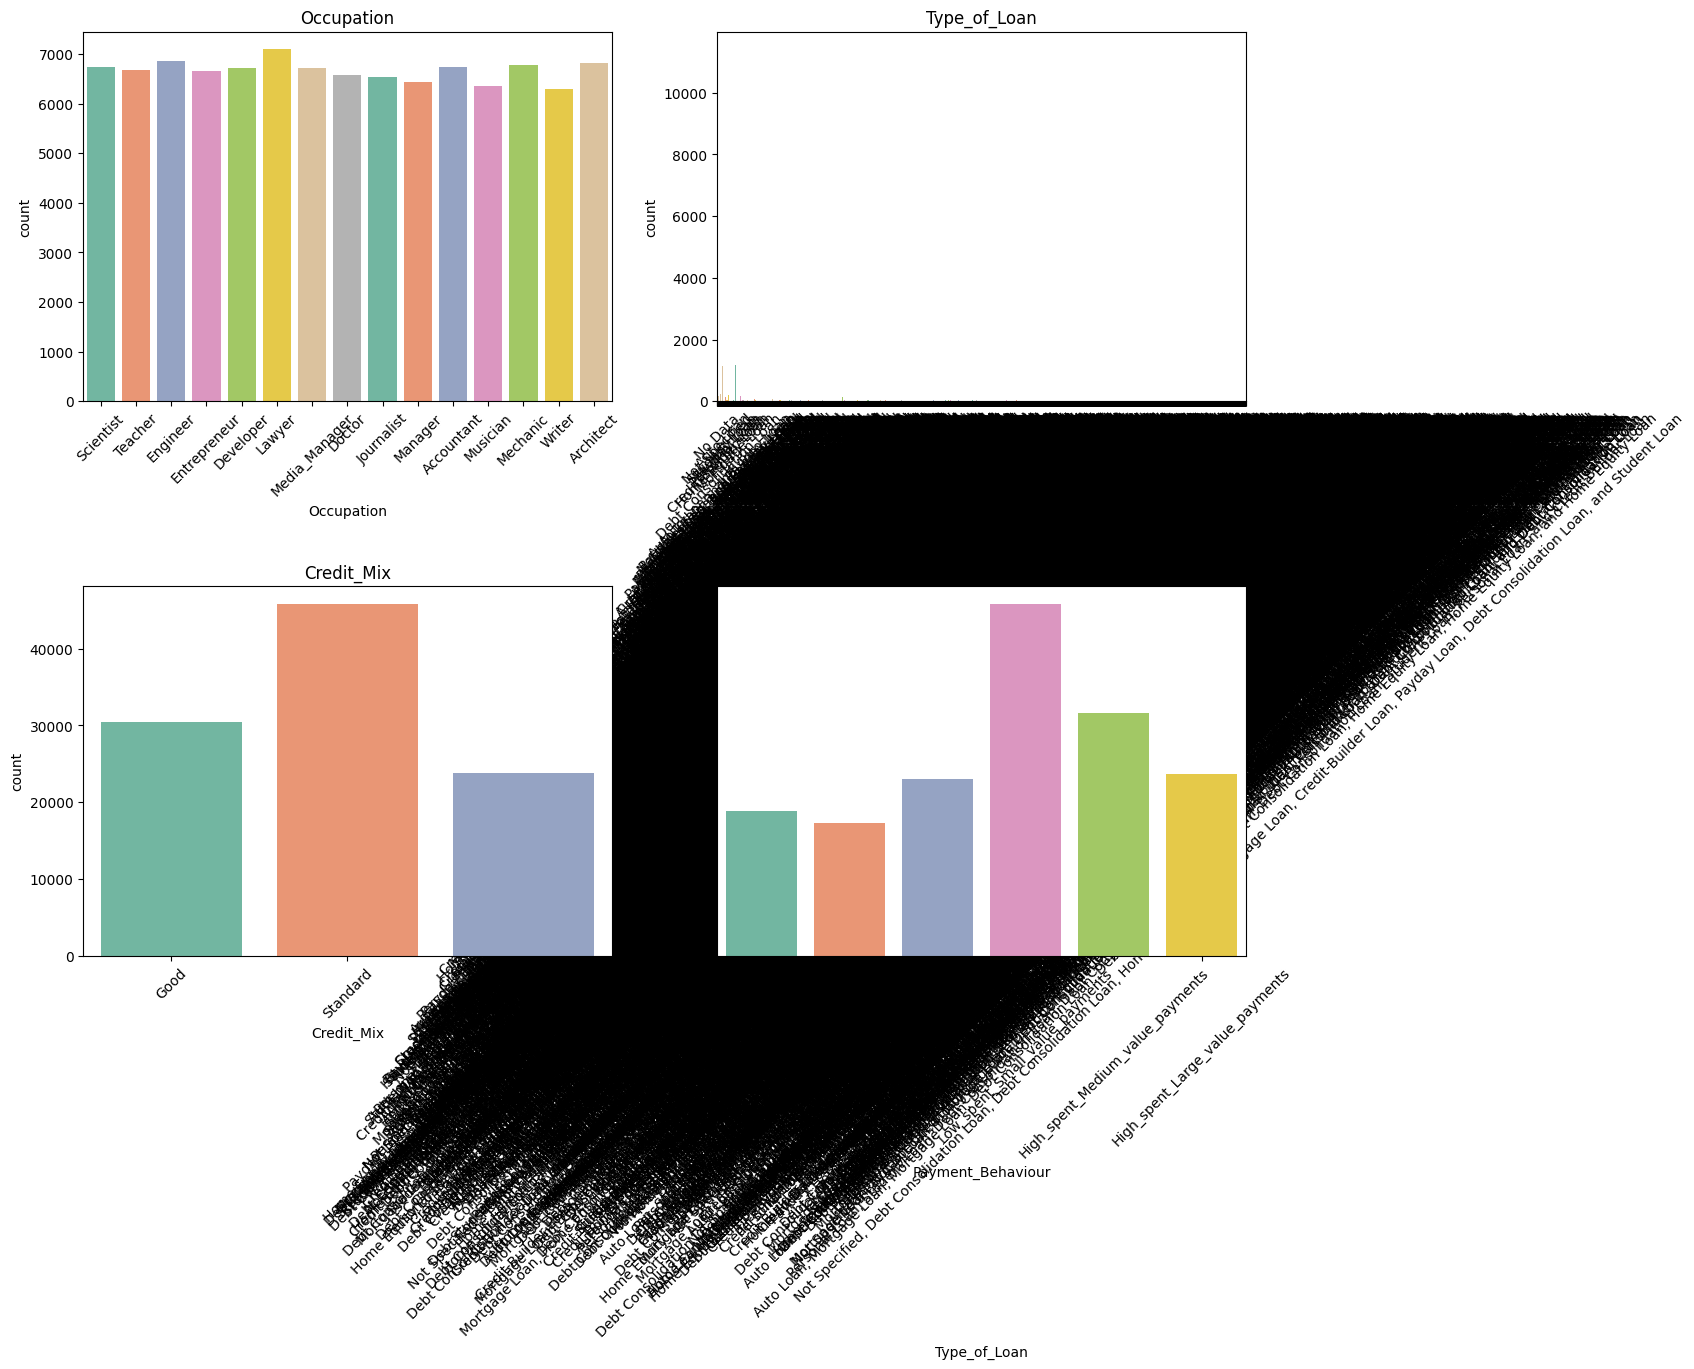

In [31]:
# Categorical variables
categorical_vars = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour']

# Plot bar plots for categorical variables with manual layout adjustment
plt.figure(figsize=(15, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=credit, x=var, hue=var, palette='Set2', legend=False)
    plt.title(var)
    plt.xticks(rotation=45)

# Manually adjust layout to increase vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Increase vertical spacing
plt.show()


BIVARIATE ANALYSIS

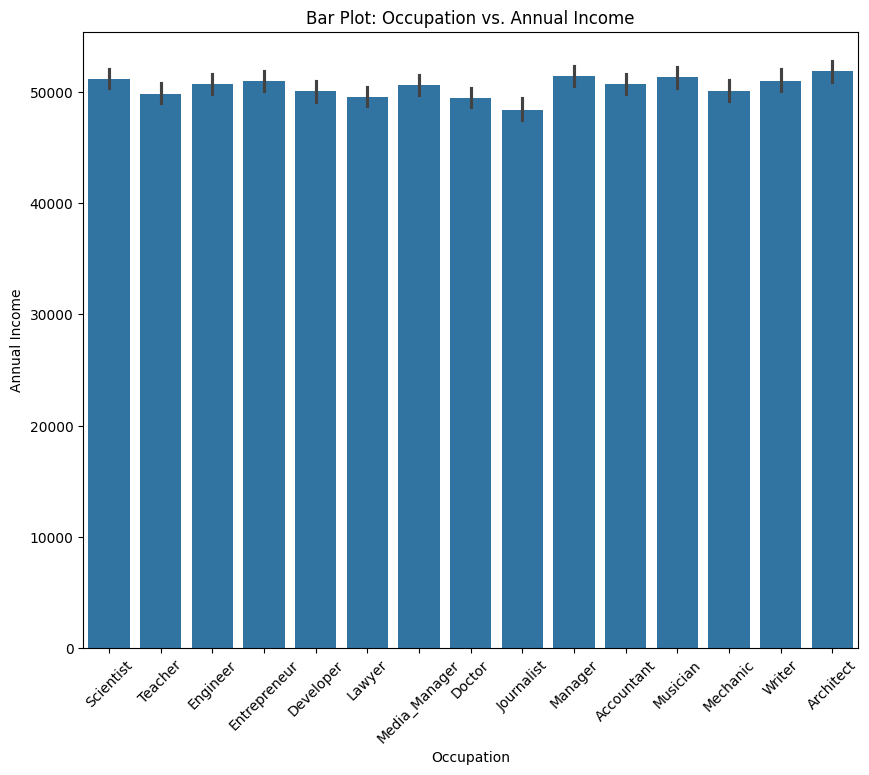

In [33]:
#occupation vs annual income
plt.figure(figsize=(10, 8))
sns.barplot(data=credit, x='Occupation', y='Annual_Income')
plt.title('Bar Plot: Occupation vs. Annual Income')
plt.xlabel('Occupation')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Annual_Income'>

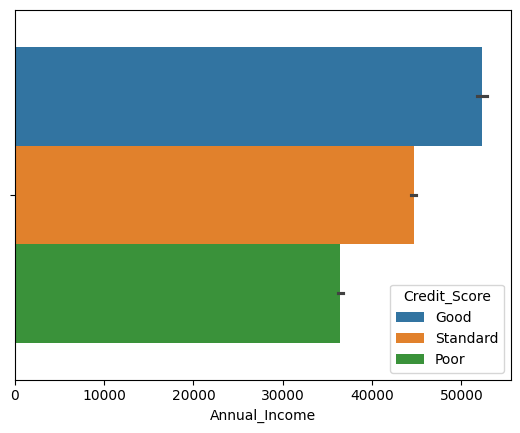

In [56]:
sns.barplot(x='Annual_Income',hue='Credit_Score',data=credit)

<Axes: xlabel='Monthly_Inhand_Salary'>

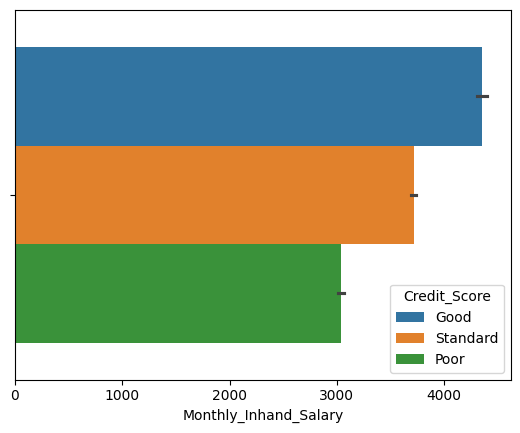

In [55]:
sns.barplot(x='Monthly_Inhand_Salary',hue='Credit_Score',data=credit)

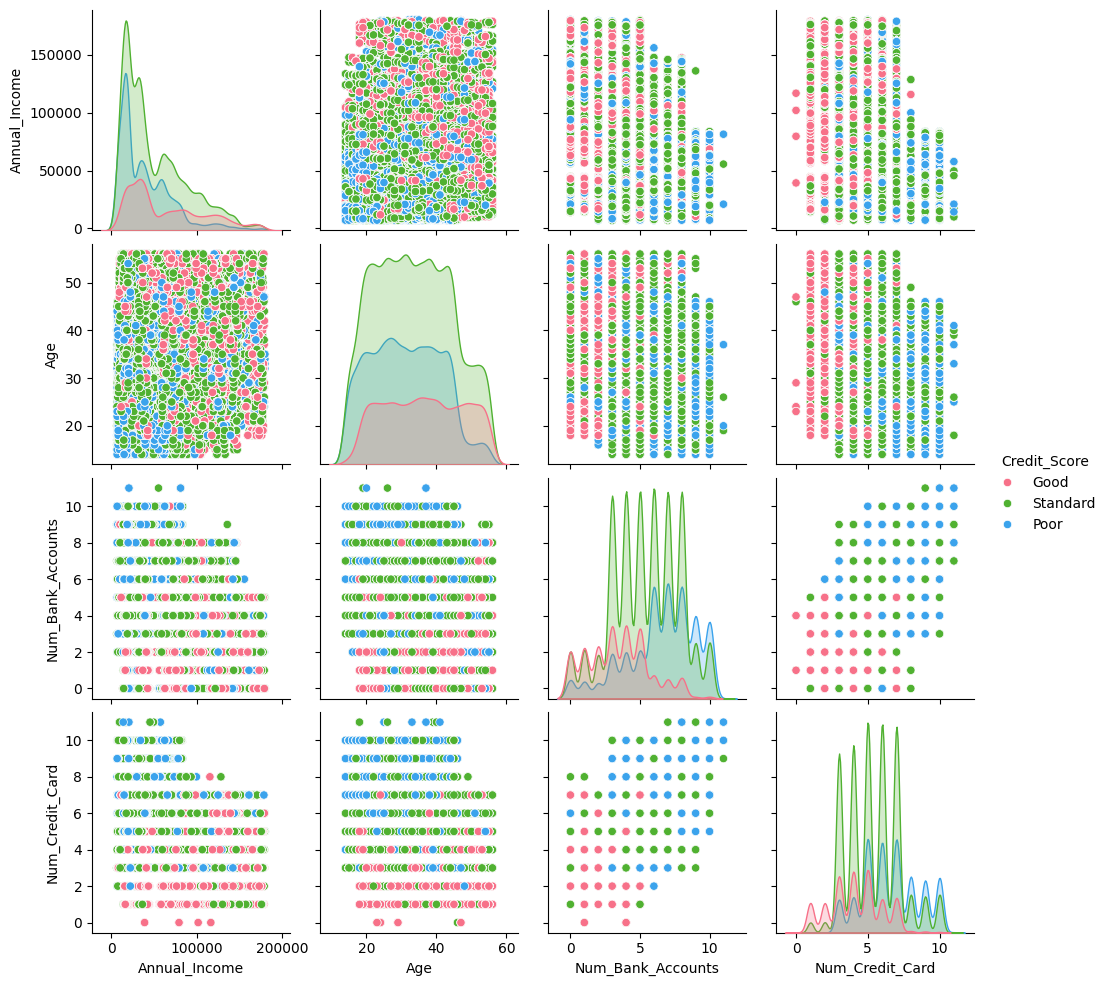

In [36]:
#  pairplot
columns_of_interest = ['Credit_Score', 'Annual_Income', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card']
sns.pairplot(credit[columns_of_interest], hue='Credit_Score', diag_kind='kde', palette='husl')
plt.show()


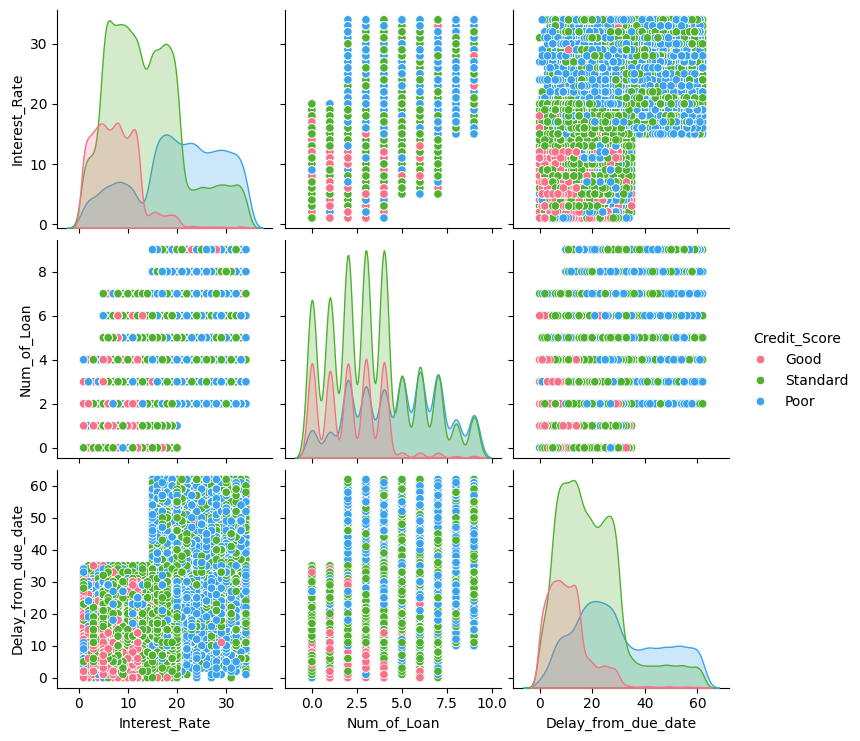

In [43]:
#  pairplot
columns_of_interest = ['Credit_Score','Interest_Rate','Num_of_Loan','Type_of_Loan','Delay_from_due_date']
sns.pairplot(credit[columns_of_interest], hue='Credit_Score', diag_kind='kde', palette='husl')
plt.show()

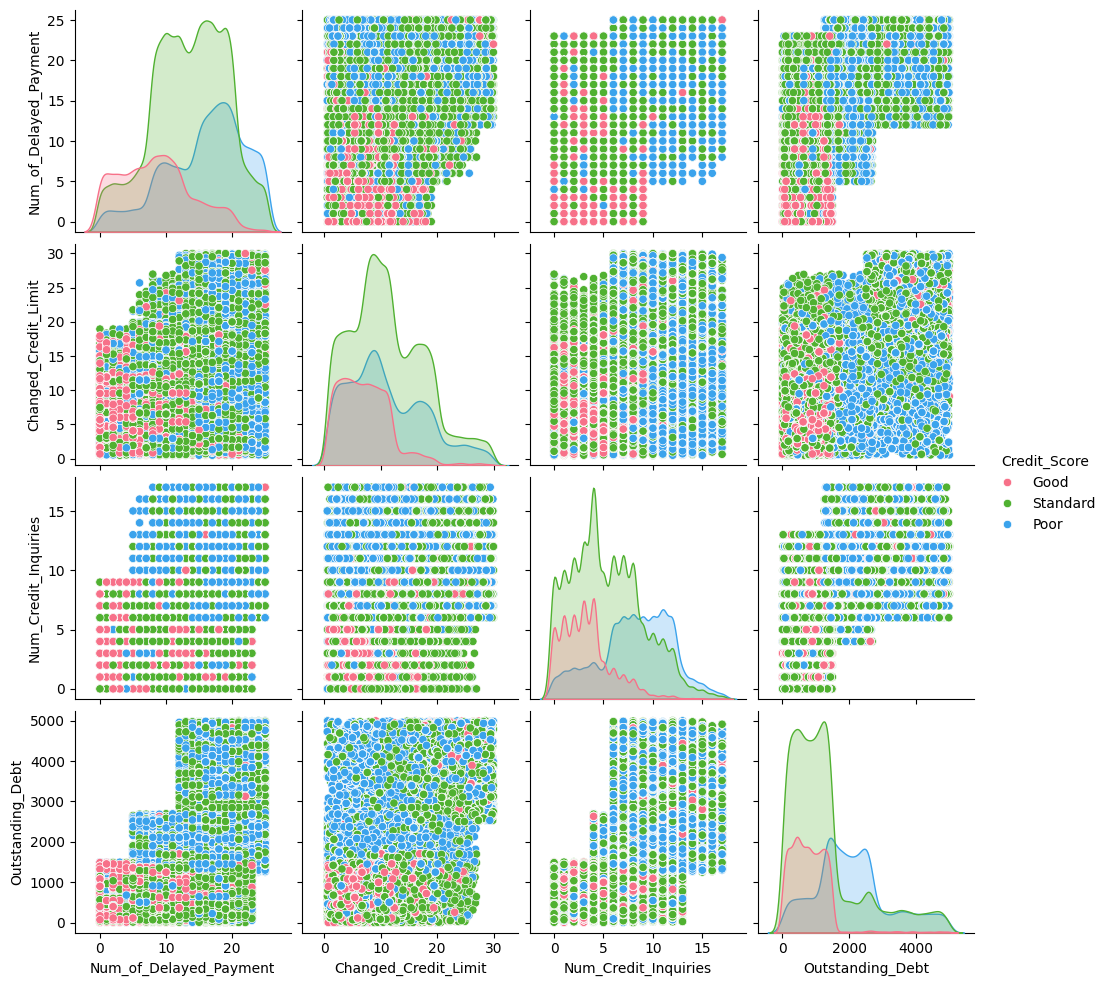

In [45]:
#pairplot
numerical_columns = ['Credit_Score', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt']
sns.pairplot(credit[numerical_columns], hue='Credit_Score', diag_kind='kde', palette='husl')
plt.show()




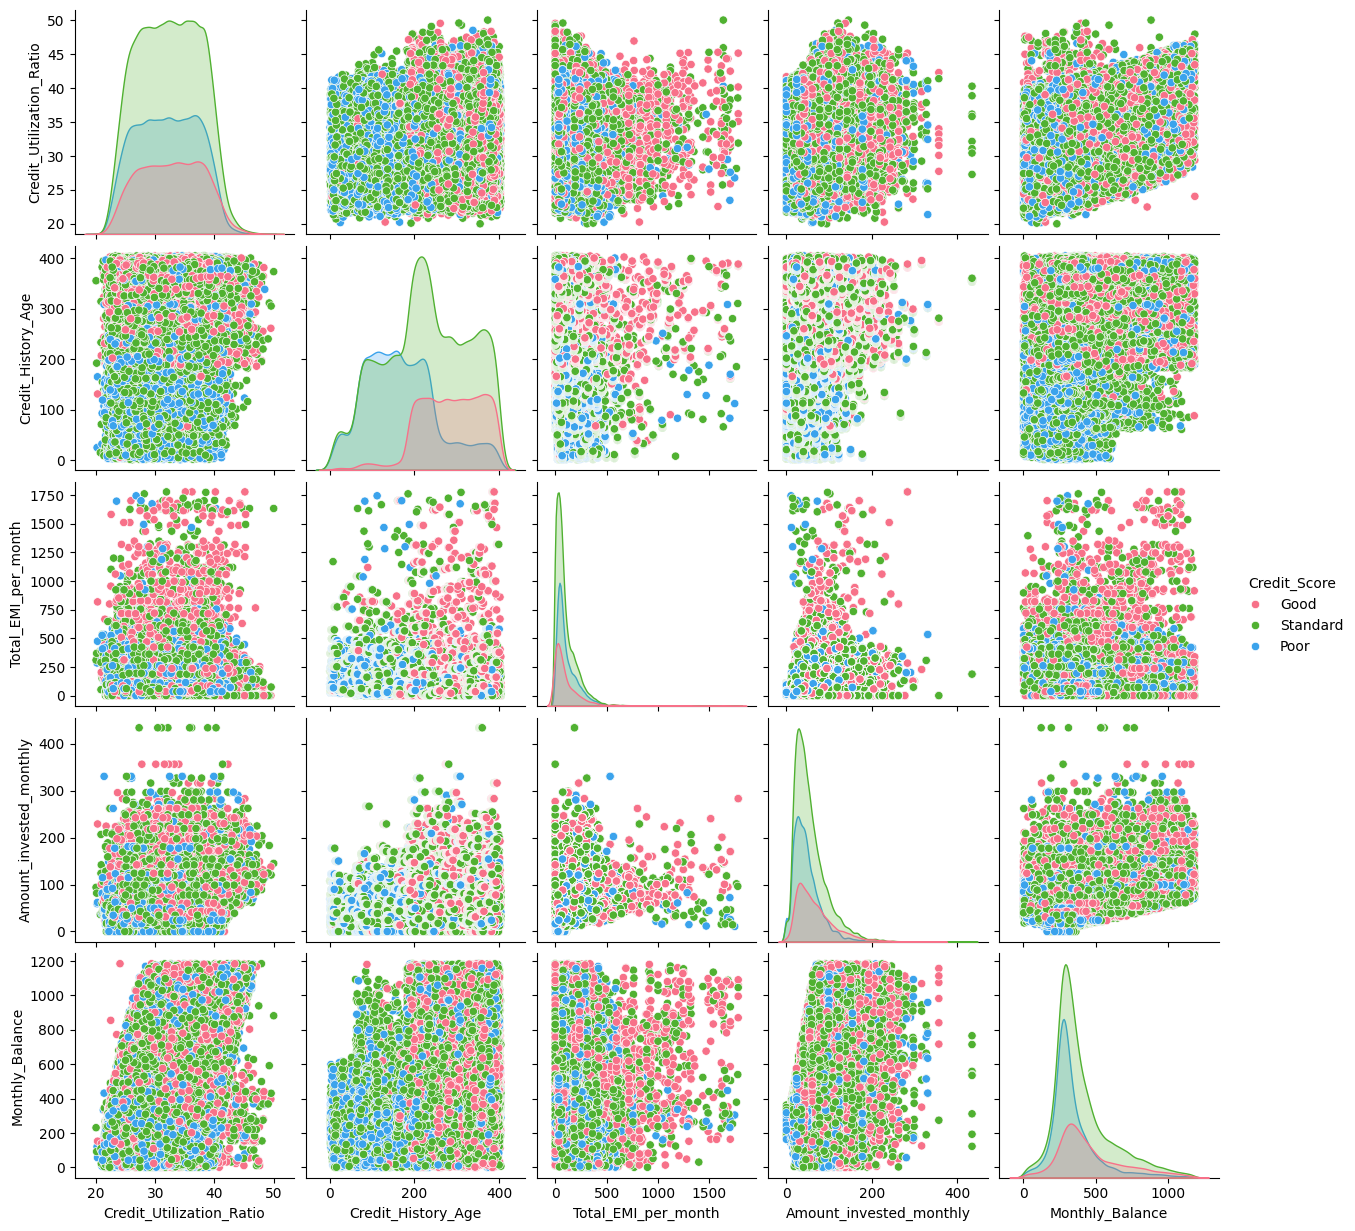

In [47]:
# pairplot
numerical_columns = ['Credit_Score','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
sns.pairplot(credit[numerical_columns], hue='Credit_Score', diag_kind='kde', palette='husl')
plt.show()


**HEATMAP**

<ipython-input-35-ab107ae51ac7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = credit.corr()


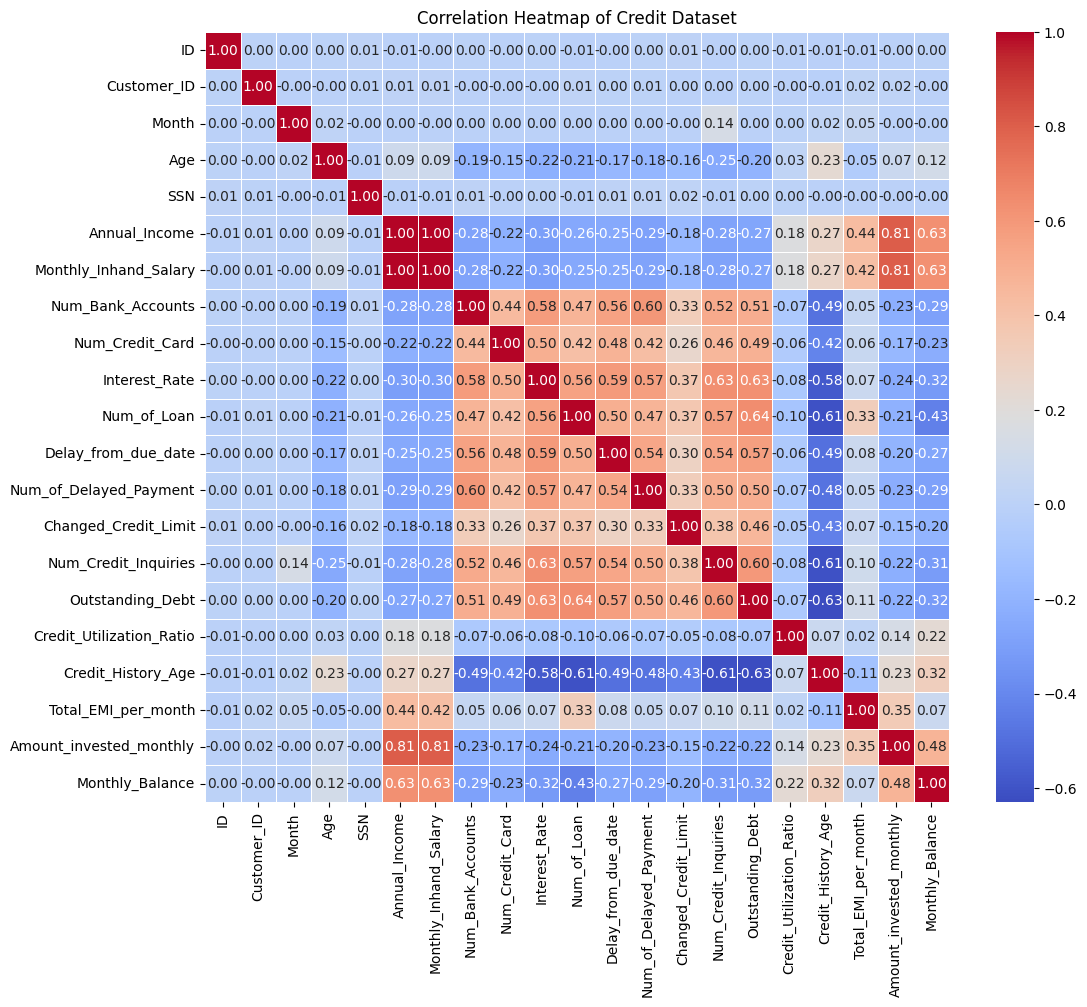

In [35]:
correlation_matrix = credit.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Credit Dataset')
plt.show()


**OUTLIERS DETECTION**

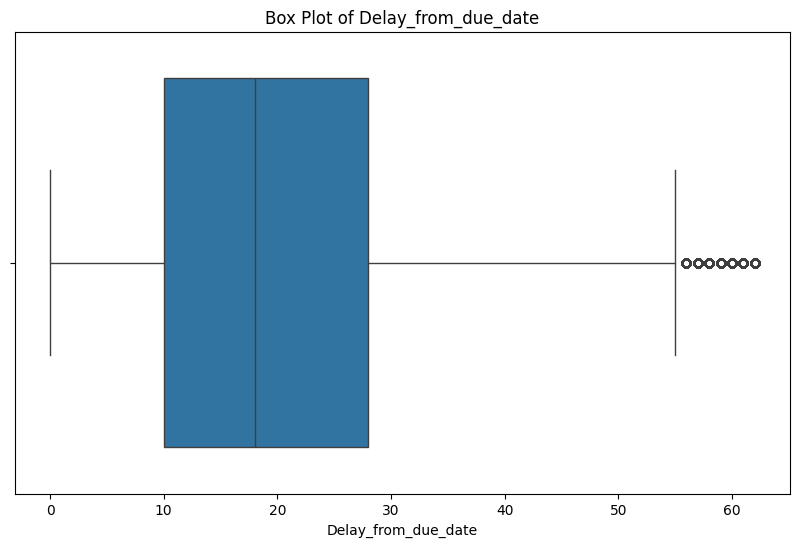

In [36]:
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit['Delay_from_due_date'])
plt.title('Box Plot of Delay_from_due_date')
plt.show()

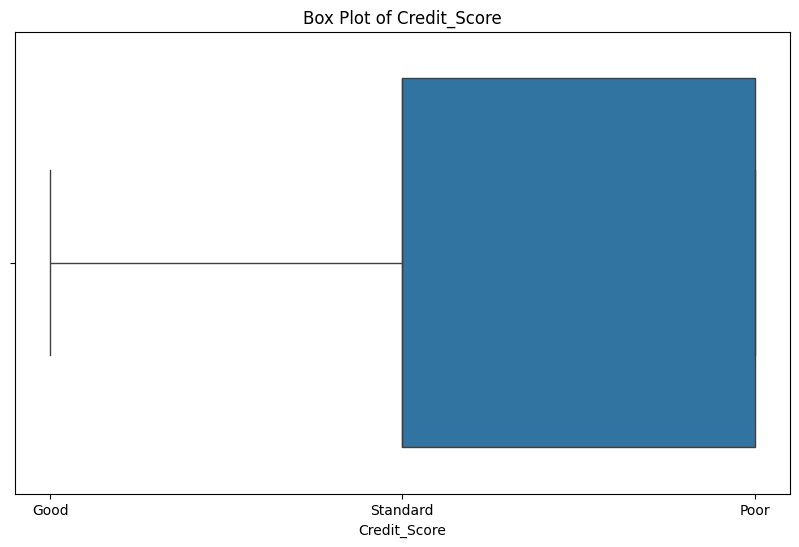

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit['Credit_Score'])
plt.title('Box Plot of Credit_Score')
plt.show()

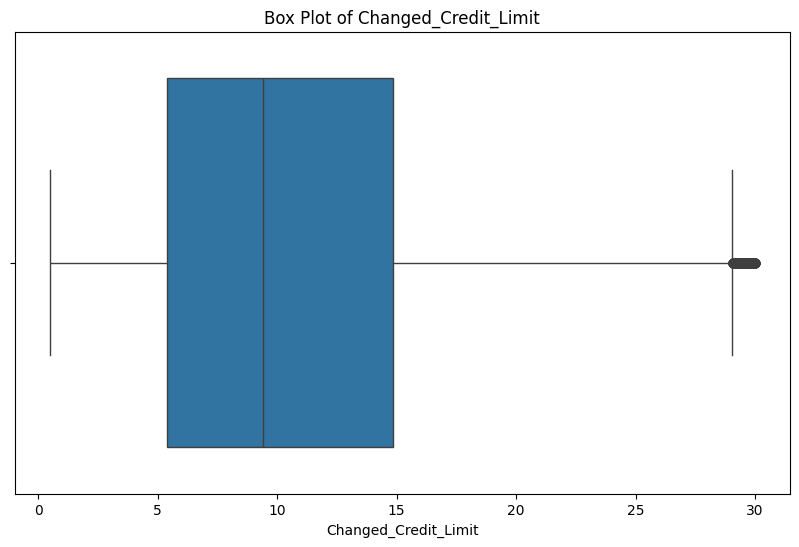

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit['Changed_Credit_Limit'])
plt.title('Box Plot of Changed_Credit_Limit')
plt.show()

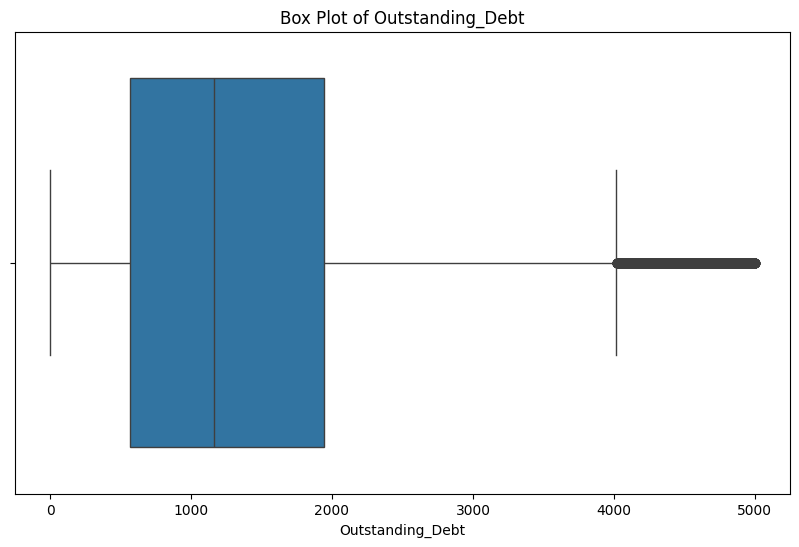

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit['Outstanding_Debt'])
plt.title('Box Plot of Outstanding_Debt')
plt.show()

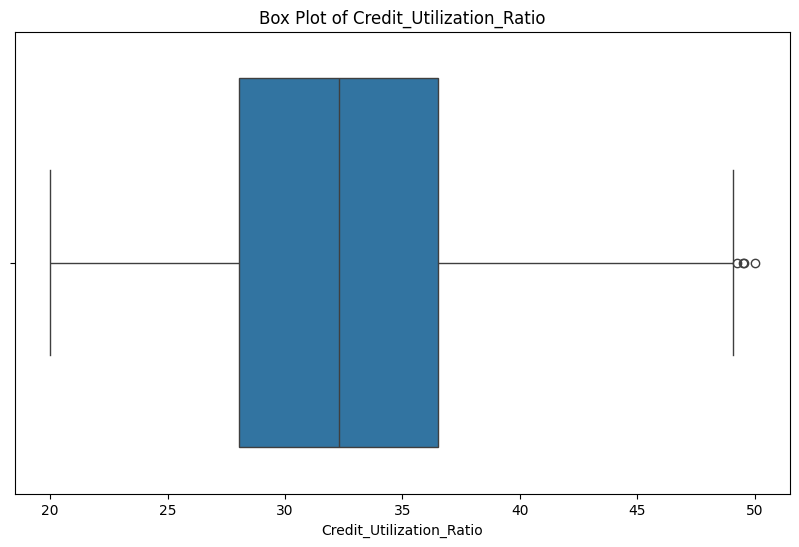

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit['Credit_Utilization_Ratio'])
plt.title('Box Plot of Credit_Utilization_Ratio')
plt.show()

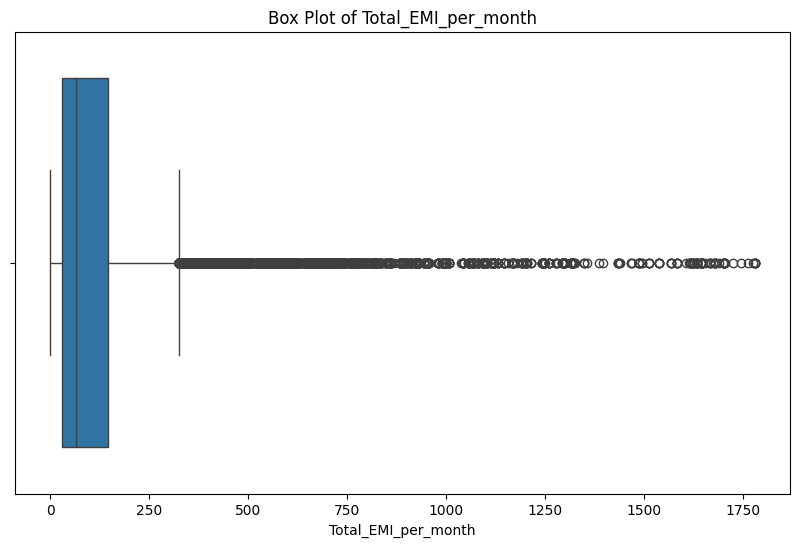

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit['Total_EMI_per_month'])
plt.title('Box Plot of Total_EMI_per_month')
plt.show()

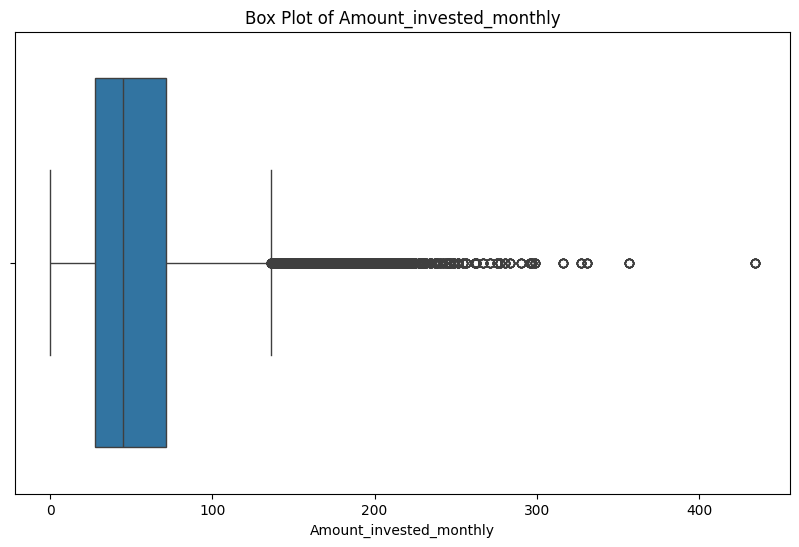

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit['Amount_invested_monthly'])
plt.title('Box Plot of Amount_invested_monthly')
plt.show()

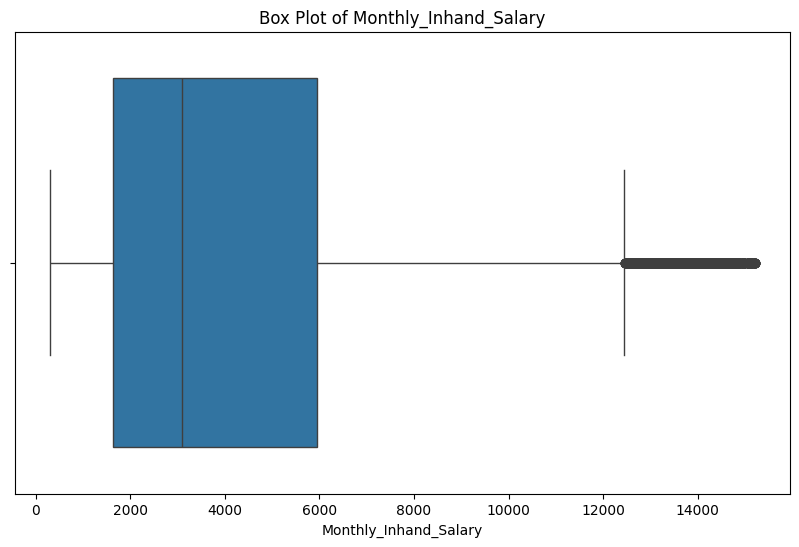

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit['Monthly_Inhand_Salary'])
plt.title('Box Plot of Monthly_Inhand_Salary')
plt.show()

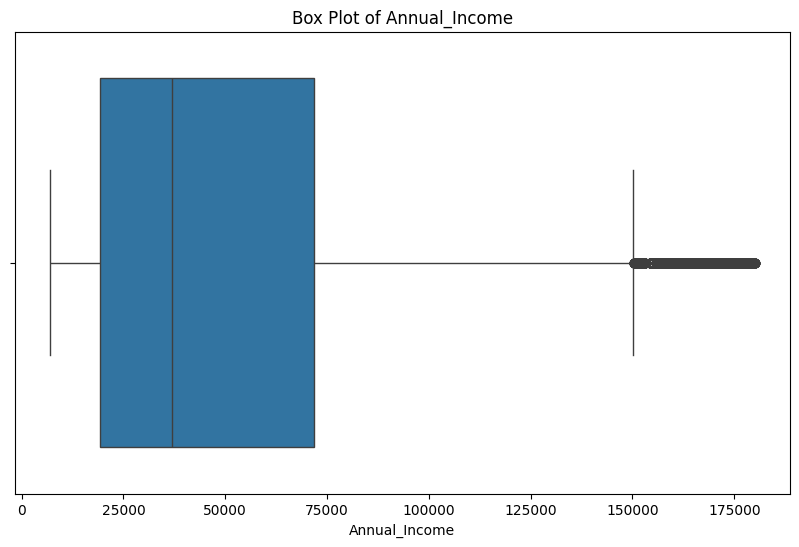

In [44]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit['Annual_Income'])
plt.title('Box Plot of Annual_Income')
plt.show()


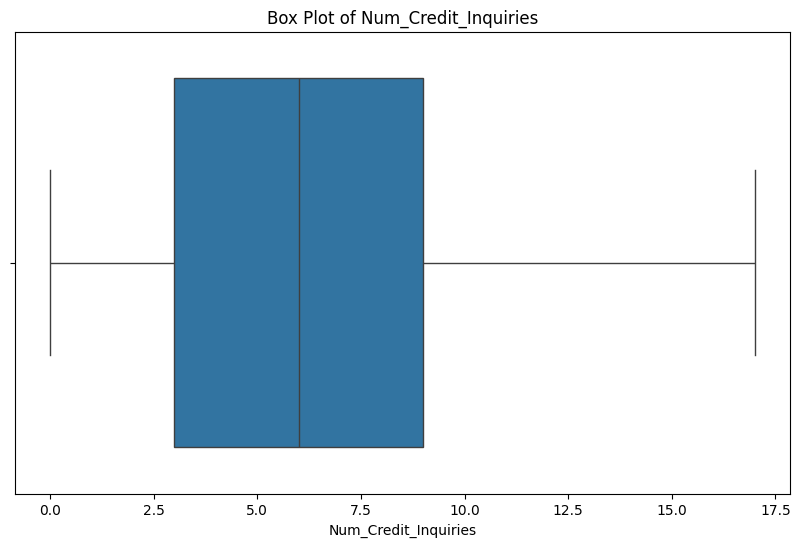

In [53]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit['Num_Credit_Inquiries'])
plt.title('Box Plot of Num_Credit_Inquiries')
plt.show()

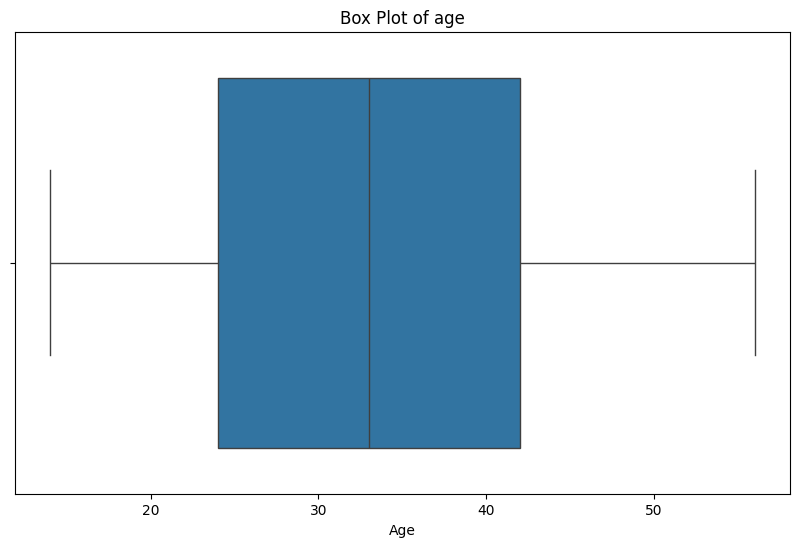

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit['Age'])
plt.title('Box Plot of age')
plt.show()

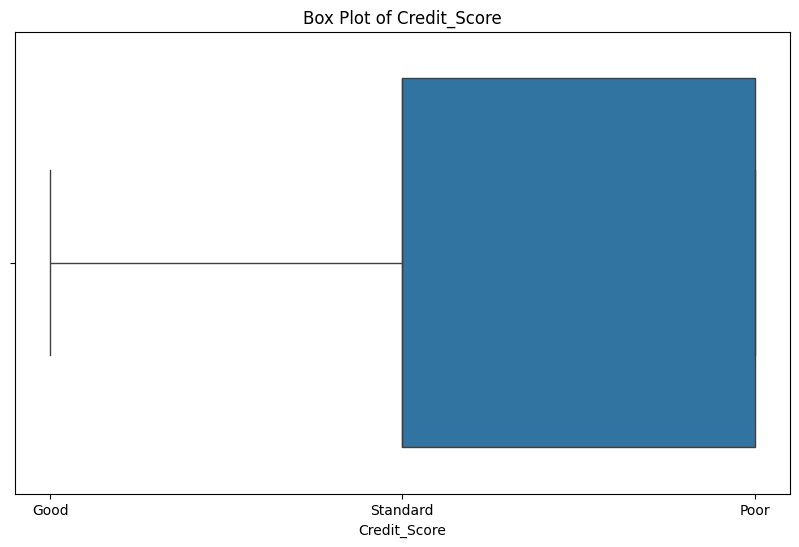

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit['Credit_Score'])
plt.title('Box Plot of Credit_Score')
plt.show()

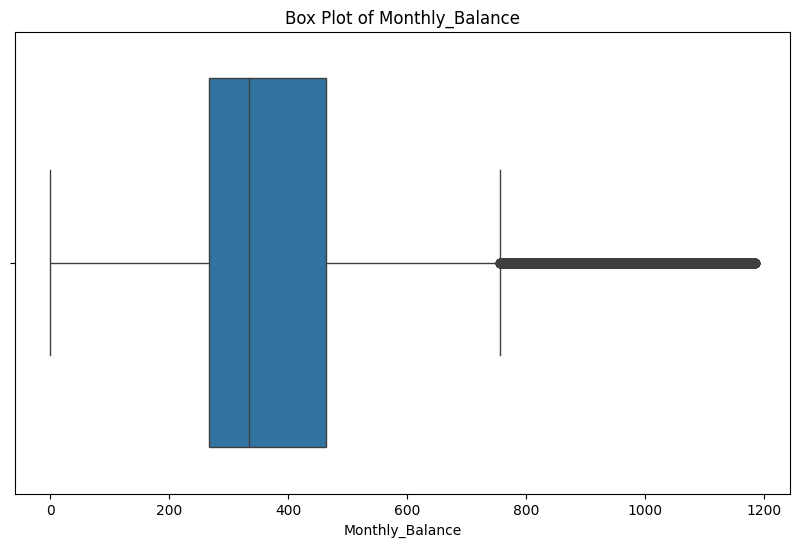

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit['Monthly_Balance'])
plt.title('Box Plot of Monthly_Balance')
plt.show()

In [5]:
#Check outliers present or  not in all columns
# Calculate z-scores for each column
z_scores = np.abs((credit - credit.mean()) / credit.std())

# Identify outliers using z-score threshold (e.g., 3)
outliers_z_score = (z_scores > 3).any(axis=0)

print("Columns with outliers using Z-score method:")
print(outliers_z_score)


<ipython-input-5-6f9ddeb2fcfe>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((credit - credit.mean()) / credit.std())
<ipython-input-5-6f9ddeb2fcfe>:7: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((credit - credit.mean()) / credit.std())


Columns with outliers using Z-score method:
Age                         False
Amount_invested_monthly      True
Annual_Income                True
Changed_Credit_Limit        False
Credit_History_Age          False
Credit_Mix                  False
Credit_Score                False
Credit_Utilization_Ratio     True
Customer_ID                 False
Delay_from_due_date         False
ID                          False
Interest_Rate               False
Month                       False
Monthly_Balance              True
Monthly_Inhand_Salary        True
Name                        False
Num_Bank_Accounts           False
Num_Credit_Card             False
Num_Credit_Inquiries        False
Num_of_Delayed_Payment      False
Num_of_Loan                 False
Occupation                  False
Outstanding_Debt             True
Payment_Behaviour           False
Payment_of_Min_Amount       False
SSN                         False
Total_EMI_per_month          True
Type_of_Loan                False
dtyp

# **PREPROCESSING**

# DATA CLEANING

In [64]:
df=credit.copy()
df



ID  Customer_ID  Month           Name   Age          SSN  \
0        5634         3392      1  Aaron Maashoh  23.0  821000265.0   
1        5635         3392      2  Aaron Maashoh  23.0  821000265.0   
2        5636         3392      3  Aaron Maashoh  23.0  821000265.0   
3        5637         3392      4  Aaron Maashoh  23.0  821000265.0   
4        5638         3392      5  Aaron Maashoh  23.0  821000265.0   
...       ...          ...    ...            ...   ...          ...   
99995  155625        37932      4          Nicks  25.0   78735990.0   
99996  155626        37932      5          Nicks  25.0   78735990.0   
99997  155627        37932      6          Nicks  25.0   78735990.0   
99998  155628        37932      7          Nicks  25.0   78735990.0   
99999  155629        37932      8          Nicks  25.0   78735990.0   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                3.0   
1      Scientist       19114.12            1824.843333                3.0   
2      Scientist       19114.12            1824.843333                3.0   
3      Scientist       19114.12            1824.843333                3.0   
4      Scientist       19114.12            1824.843333                3.0   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                4.0   
99996   Mechanic       39628.99            3359.415833                4.0   
99997   Mechanic       39628.99            3359.415833                4.0   
99998   Mechanic       39628.99            3359.415833                4.0   
99999   Mechanic       39628.99            3359.415833                4.0   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                  265.0                     No            49.574949   
1                  266.0                     No            49.574949   
2                  267.0                     No            49.574949   
3                  268.0                     No            49.574949   
4                  269.0                     No            49.574949   
...                  ...                    ...                  ...   
99995              378.0                     No            35.104023   
99996              379.0                     No            35.104023   
99997              380.0                     No            35.104023   
99998              381.0                     No            35.104023   
99999              382.0                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    21.465380   High_spent_Small_value_payments   
1                    21.465380    Low_spent_Large_value_payments   
2                    21.465380   Low_spent_Medium_value_payments   
3                    21.465380    Low_spent_Small_value_payments   
4                    21.465380  High_spent_Medium_value_payments   
...                        ...                               ...   
99995                24.028477   High_spent_Large_v

# HANDLING  DUPLICATES

In [65]:
##drop if any duplicates
df.drop_duplicates(keep='first', inplace=True)

In [66]:
# Drop the some columns
df = df.drop(columns=['ID', 'Customer_ID', 'Name', 'Occupation'])

In [67]:
df

Month   Age          SSN  Annual_Income  Monthly_Inhand_Salary  \
0          1  23.0  821000265.0       19114.12            1824.843333   
1          2  23.0  821000265.0       19114.12            1824.843333   
2          3  23.0  821000265.0       19114.12            1824.843333   
3          4  23.0  821000265.0       19114.12            1824.843333   
4          5  23.0  821000265.0       19114.12            1824.843333   
...      ...   ...          ...            ...                    ...   
99995      4  25.0   78735990.0       39628.99            3359.415833   
99996      5  25.0   78735990.0       39628.99            3359.415833   
99997      6  25.0   78735990.0       39628.99            3359.415833   
99998      7  25.0   78735990.0       39628.99            3359.415833   
99999      8  25.0   78735990.0       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.0          4.0   
2                    3.0              4.0            3.0          4.0   
3                    3.0              4.0            3.0          4.0   
4                    3.0              4.0            3.0          4.0   
...                  ...              ...            ...          ...   
99995                4.0              6.0            7.0          2.0   
99996                4.0              6.0            7.0          2.0   
99997                4.0              6.0            7.0          2.0   
99998                4.0              6.0            7.0          2.0   
99999                4.0              6.0            7.0          2.0   

                                            Type_of_Loan  ...  Credit_Mix  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...        Good   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...        Good   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...        Good   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...        Good   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...        Good   
...                                                  ...  ...         ...   
99995                        Auto Loan, and Student Loan  ...        Good   
99996                        Auto Loan, and Student Loan  ...        Good   
99997                        Auto Loan, and Student Loan  ...        Good   
99998                        Auto Loan, and Student Loan  ...        Good   
99999                        Auto Loan, and Student Loan  ...        Good   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0                809.98                 26.822620               265.0   
1                809.98                 31.944960               266.0   
2                809.98                 28.609352               267.0   
3                809.98                 31.377862               268.0   
4                809.98                 24.797347               269.0   
...                 ...                       ...                 ...   
99995            502.38                 34.663572               378.0   
99996            502.38                 40.565631               379.0   
99997            502.38                 41.255522               380.0   
99998            502.38                 33.638208               381.0   
99999            502.38                 34.192463               382.0   

      Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                        No            49.574949                21.465380   
1                        No            49.574949                21.465380   
2                        No            49.574949                21.465380   
3                        No            49.574949                21.465380   
4                        No            49.574949                21

# HANDLING OUTLIERS

In [68]:
# View total rows before filtering
print(f'The number of rows before filtering outliers is {df.shape[0]}')

# Specify columns with outliers
outlier_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
                   'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                   'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Handle outliers using z-score for each specified column
filtered_entries = np.array([True] * len(df))
for col in outlier_columns:
    zscore = np.abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

# Filter DataFrame to remove outliers
df = df[filtered_entries]

# View total rows after filtering
print(f'The number of rows after filtering outliers is {df.shape[0]}')


The number of rows before filtering outliers is 100000
The number of rows after filtering outliers is 94587


In [32]:
#  Detailed view of outliers
# Calculate z-scores for each numerical column
z_scores = stats.zscore(credit.select_dtypes(include=['int64', 'float64']))

# Define threshold for z-score
z_score_threshold = 3

# Identify outliers
outliers_mask = (z_scores > z_score_threshold) | (z_scores < -z_score_threshold)

# Make a copy of the original dataset
credit_original = credit.copy()

# Remove rows containing outliers
credit_no_outliers = credit[~outliers_mask]

# Create boolean masks for outliers before and after removal
outliers_before_removal = outliers_mask.any(axis=1)
outliers_after_removal = ~credit.index.isin(credit_no_outliers.index)
print("Outliers before removal:")
print(credit_original[outliers_before_removal])
print("\nOutliers after removal:")
print(credit_original[outliers_after_removal])


Outliers before removal:
           ID  Customer_ID  Month    Name   Age          SSN  Occupation  \
16       5658        11708      1  Langep  34.0  486853974.0    Engineer   
17       5659        11708      2  Langep  34.0  486853974.0    Engineer   
50       5708        10314      3  Nadiaq  34.0  411510676.0      Lawyer   
51       5709        10314      4  Nadiaq  34.0  411510676.0      Lawyer   
52       5710        10314      5  Nadiaq  34.0  411510676.0      Lawyer   
...       ...          ...    ...     ...   ...          ...         ...   
99628  155074        29579      5   Leahh  25.0  769441950.0  Accountant   
99629  155075        29579      6   Leahh  25.0  769441950.0  Accountant   
99630  155076        29579      7   Leahh  25.0  769441950.0  Accountant   
99631  155077        29579      8   Leahh  25.0  769441950.0  Accountant   
99671  155137         2825      8  Lianau  31.0  228474867.0      Lawyer   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts

# **ENCODING**

In [69]:

# View dimension size of data before encoding
print(f'Data dimensions before encoding are {df.shape[0]} rows and {df.shape[1]} columns')

Data dimensions before encoding are 94587 rows and 24 columns


In [70]:
# One-hot encoding
for col in ['Payment_Behaviour']:
    onehots = pd.get_dummies(df[col], prefix=col, drop_first=True)  # use drop_first=True to reduce dimensions
    df = pd.concat([df, onehots], axis=1)  # Concatenate one-hot encoded columns to df
    df.drop(columns=col, axis=1, inplace=True)  # Drop the original column from df

# Display the resulting DataFrame
print(df)




       Month   Age          SSN  Annual_Income  Monthly_Inhand_Salary  \
0          1  23.0  821000265.0       19114.12            1824.843333   
1          2  23.0  821000265.0       19114.12            1824.843333   
2          3  23.0  821000265.0       19114.12            1824.843333   
3          4  23.0  821000265.0       19114.12            1824.843333   
4          5  23.0  821000265.0       19114.12            1824.843333   
...      ...   ...          ...            ...                    ...   
99995      4  25.0   78735990.0       39628.99            3359.415833   
99996      5  25.0   78735990.0       39628.99            3359.415833   
99997      6  25.0   78735990.0       39628.99            3359.415833   
99998      7  25.0   78735990.0       39628.99            3359.415833   
99999      8  25.0   78735990.0       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0         

In [71]:
#Label encoding of Credit_Score
label_mapping = {'Good': 0, 'Standard': 1, 'Poor': 2}

# Map the categories to numerical labels using the defined mapping
df['Credit_Score_Encoded'] = df['Credit_Score'].map(label_mapping)



In [72]:
#Label encoding of Payment_of_Min_Amount
payment_mapping = {'Yes': 1, 'No': 0, 'NM': -1}

# Apply label encoding using map
df['Payment_of_Min_Amount_Encoded'] = df['Payment_of_Min_Amount'].map(payment_mapping)




In [73]:
#Label encoding of Credit_Mix
credit_mix_mapping = {'Standard': 0, 'Good': 1, 'Bad': 2}

# Apply label encoding using map
df['Credit_Mix_Encoded'] = df['Credit_Mix'].map(credit_mix_mapping)



In [77]:
#Label encoding of Type_of_Loan
loan_mapping = {'No Data': 0, 'Not Specified': 1, 'Credit-Builder Loan': 2, 'Personal Loan': 3,
                'Debt Consolidation Loan': 4, 'Other_Category_1': 5, 'Other_Category_2': 6,
                # Continue defining mappings for other categories as needed
                }

# Apply label encoding using map
credit['Type_of_Loan_Encoded'] = credit['Type_of_Loan'].map(loan_mapping)


In [80]:
# View dimension size of data after encoding
print(f'Data dimensions after encoding are {df.shape[0]} rows and {df.shape[1]} columns')

Data dimensions after encoding are 94587 rows and 31 columns


In [81]:
df_encoded.head()

Month   Age          SSN  Annual_Income  Monthly_Inhand_Salary  \
0      1  23.0  821000265.0       19114.12            1824.843333   
1      2  23.0  821000265.0       19114.12            1824.843333   
2      3  23.0  821000265.0       19114.12            1824.843333   
3      4  23.0  821000265.0       19114.12            1824.843333   
4      5  23.0  821000265.0       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                3.0              4.0            3.0          4.0   
1                3.0              4.0            3.0          4.0   
2                3.0              4.0            3.0          4.0   
3                3.0              4.0            3.0          4.0   
4                3.0              4.0            3.0          4.0   

   Delay_from_due_date  ...  Payment_of_Min_Amount_Yes  \
0                  3.0  ...                          0   
1                  3.0  ...                          0   
2                  3.0  ...                          0   
3                  5.0  ...                          0   
4                  6.0  ...                          0   

   Payment_Behaviour_High_spent_Large_value_payments  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  1    

   Payment_Behaviour_High_spent_Small_value_payments  \
0                                                  1   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Payment_Behaviour_Low_spent_Large_value_payments  \
0                                                 0   
1                                                 1   
2                                                 0   
3                                                 0   
4                                                 0   

   Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                                  0   
1                                                  0   
2                                                  1   
3                                                  0   
4                                                  0   

   Payment_Behaviour_Low_spent_Small_value_payments  Credit_Score_Good  \
0                                                 0                  1   
1                                                 0                  1   
2                                                 0                  1   
3                                                 1                  1   
4                                                 0                  1   

   Credit_Score_Poor  Credit_Score_Standard  
0                  0                      0  
1                  0                      0  
2                  0                      0  
3                  0                      0  
4                  0                      0  

[5 rows x 6146 columns]

# **SCALING**

In [82]:
# scaling using standardization
outlier_columns = ['Annual_Income', 'Monthly_Inhand_Salary','Delay_from_due_date',
                   'Changed_Credit_Limit', 'Outstanding_Debt']

scaler = StandardScaler()
df[outlier_columns] = scaler.fit_transform(df[outlier_columns])


# NORMALIZATION

In [83]:
# scaling using normalization
outlier_columns = ['Credit_Utilization_Ratio','Total_EMI_per_month', 'Amount_invested_monthly','Monthly_Balance']
scaler = MinMaxScaler()
df[outlier_columns] = scaler.fit_transform(df[outlier_columns])


# **Split data into training, validation, and testing sets**

In [84]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

# Split the data into training (70%) and temporary sets (30%)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary set into validation (15%) and testing sets (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the dimensions of the resulting sets
print("Training set dimensions:", X_train_temp.shape, y_train_temp.shape)
print("Validation set dimensions:", X_val.shape, y_val.shape)
print("Testing set dimensions:", X_test.shape, y_test.shape)



Training set dimensions: (66210, 30) (66210,)
Validation set dimensions: (14188, 30) (14188,)
Testing set dimensions: (14189, 30) (14189,)
